In [1]:
import numpy as np
import pandas as pd 
from statsmodels.formula.api import ols as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
teen_gamb = pd.read_csv('/Users/evancolvin/Downloads/teengamb.csv')
teen_gamb = teen_gamb.drop('Unnamed: 0', 1) 
print teen_gamb.head(10)
print "\n\n\n"
print teen_gamb.describe()

   sex  status  income  verbal  gamble
0    1      51    2.00       8    0.00
1    1      28    2.50       8    0.00
2    1      37    2.00       6    0.00
3    1      28    7.00       4    7.30
4    1      65    2.00       8   19.60
5    1      61    3.47       6    0.10
6    1      28    5.50       7    1.45
7    1      27    6.42       5    6.60
8    1      43    2.00       6    1.70
9    1      18    6.00       7    0.10




             sex     status     income     verbal      gamble
count  47.000000  47.000000  47.000000  47.000000   47.000000
mean    0.404255  45.234043   4.641915   6.659574   19.301064
std     0.496053  17.262944   3.551371   1.856558   31.515866
min     0.000000  18.000000   0.600000   1.000000    0.000000
25%     0.000000  28.000000   2.000000   6.000000    1.100000
50%     0.000000  43.000000   3.250000   7.000000    6.000000
75%     1.000000  61.500000   6.210000   8.000000   19.400000
max     1.000000  75.000000  15.000000  10.000000  156.000000


             sex     status     income     verbal      gamble
count  47.000000  47.000000  47.000000  47.000000   47.000000
mean    0.404255  45.234043   4.641915   6.659574   19.301064
std     0.496053  17.262944   3.551371   1.856558   31.515866
min     0.000000  18.000000   0.600000   1.000000    0.000000
25%     0.000000  28.000000   2.000000   6.000000    1.100000
50%     0.000000  43.000000   3.250000   7.000000    6.000000
75%     1.000000  61.500000   6.210000   8.000000   19.400000
max     1.000000  75.000000  15.000000  10.000000  156.000000


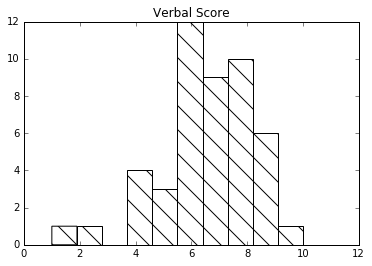

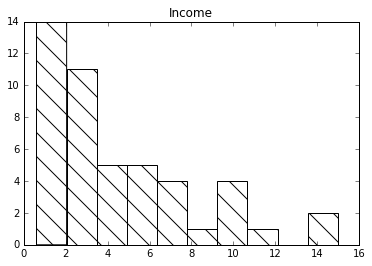

In [11]:
print teen_gamb.describe()
plt.hist(teen_gamb.verbal, color = 'white', hatch = '\\')
plt.title("Verbal Score")
plt.show()
plt.hist(teen_gamb.income, color = 'white', hatch = '\\')
plt.title("Income")
plt.show()

/Users/evancolvin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


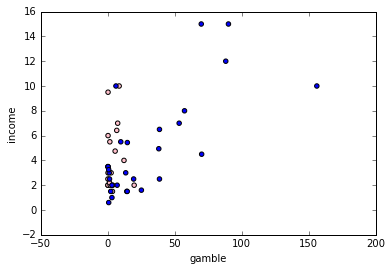

In [12]:
teen_gamb['c'] = 'pink'
for i in range(len(teen_gamb['c'])):
    if teen_gamb['sex'][i] == 0:
        teen_gamb['c'][i] = 'blue'
        
ax = teen_gamb.plot(kind = 'scatter', x = 'gamble', y = 'income',
                                        c = teen_gamb['c'])

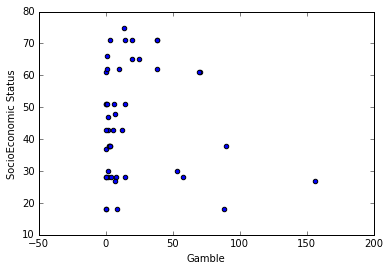

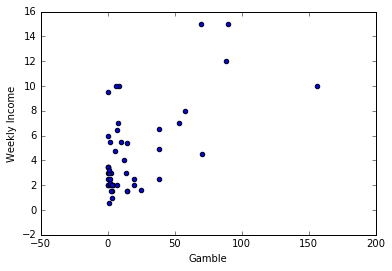

In [13]:
plt.scatter(teen_gamb.gamble, teen_gamb.status)
plt.xlabel('Gamble')
plt.ylabel('SocioEconomic Status')
plt.show()

plt.scatter(teen_gamb.gamble, teen_gamb.income)
plt.xlabel('Gamble')
plt.ylabel('Weekly Income')

In [14]:
lmod = lm(formula = "gamble ~ sex + status + income + verbal", data = teen_gamb).fit()
print lmod.params
print "\n\n\n"
print lmod.summary()

Intercept    22.555651
sex         -22.118330
status        0.052234
income        4.961979
verbal       -2.959493
dtype: float64




                            OLS Regression Results                            
Dep. Variable:                 gamble   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     11.69
Date:                Wed, 14 Sep 2016   Prob (F-statistic):           1.81e-06
Time:                        15:59:22   Log-Likelihood:                -210.78
No. Observations:                  47   AIC:                             431.6
Df Residuals:                      42   BIC:                             440.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int

In [15]:
dir(lmod)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'nobs',
 'normalized_cov_params',
 'outlier_test',
 'params',
 'predict',
 '

The mean of the residuals is 6.62845664881e-13 which is what we want


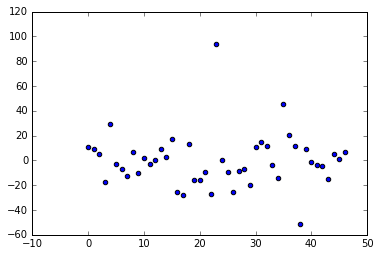

In [16]:
plt.scatter(range(len(teen_gamb)), lmod.resid)
print "The mean of the residuals is {} which is what we want".format(lmod.resid.mean())

In [17]:
for i in range(len(teen_gamb)):
    print round(lmod.fittedvalues[i], 1), teen_gamb.gamble[i]

-10.7 0.0
-9.4 0.0
-5.5 0.0
24.8 7.3
-9.9 19.6
3.1 0.1
8.5 1.45
18.9 6.6
-5.1 1.7
10.4 0.1
-1.5 0.1
8.5 5.4
1.1 1.2
-5.9 3.6
-0.4 2.4
-13.8 3.4
25.4 0.1
36.2 8.4
-1.1 12.0
16.0 0.0
17.0 1.0
10.8 1.2
27.4 0.1
61.7 156.0
37.8 38.5
11.3 2.1
40.4 14.5
11.7 3.0
7.5 0.6
29.4 9.6
77.1 88.0
38.1 53.2
78.3 90.0
6.6 3.0
28.5 14.1
24.4 70.0
18.0 38.5
46.0 57.2
57.1 6.0
16.1 25.0
8.4 6.9
73.5 69.7
17.7 13.3
15.5 0.6
32.5 38.0
13.0 14.4
12.0 19.2


In [20]:
import itertools
prostate = pd.read_csv('~/downloads/prostate.csv')
prostate = prostate.drop('Unnamed: 0', 1)

print prostate.head()


     lcavol  lweight  age      lbph  svi      lcp  gleason  pgg45     lpsa
0 -0.579819   2.7695   50 -1.386294    0 -1.38629        6      0 -0.43078
1 -0.994252   3.3196   58 -1.386294    0 -1.38629        6      0 -0.16252
2 -0.510826   2.6912   74 -1.386294    0 -1.38629        7     20 -0.16252
3 -1.203973   3.2828   58 -1.386294    0 -1.38629        6      0 -0.16252
4  0.751416   3.4324   62 -1.386294    0 -1.38629        6      0  0.37156


In [21]:
predictors = prostate.columns[:-1].tolist()
# Gets all possible combinations of the variables without duplicates
# except for the basic model without an intercept
combos = []
for length in range(1, len(predictors)+1):
    for subset in itertools.combinations(predictors, length):
        combos.append(subset)
# Gets each element of the list into a string that I can put into 
# the lm function 
models = []
for model in combos:
    models.append('lpsa ~ ' + ' + '.join(model))
# computes each linear model and attaches that model to its 
# adjusted r-squared in a new list 


In [22]:
models_and_fit = [] # clearing memory
for i in range(len(models)):
    this_mod = lm(formula = models[i], data = prostate).fit()
    models_and_fit.append([models[i], this_mod.rsquared_adj])    
# pulls out the best model based on the highest adjusted r-squared 
best_model = sorted(models_and_fit, key = lambda x: x[1])[-1]

print "The Best model is \n \t{} \n with an adjusted R-squared of {}".format(best_model[0], best_model[1])

The Best model is 
 	lpsa ~ lcavol + lweight + age + lbph + svi + lcp + pgg45 
 with an adjusted R-squared of 0.627252123499


In [23]:
models_and_fit = [] # clearing memory
for i in range(len(models)):
    this_mod = lm(formula = models[i], data = prostate).fit()
    models_and_fit.append([models[i], this_mod.aic])    
# pulls out the best model based on the highest adjusted r-squared 
best_model = sorted(models_and_fit, key = lambda x: x[1])[-1]

print "The Best model is \n \t{} \n with an AIC of {}".format(best_model[0], best_model[1])

The Best model is 
 	lpsa ~ age + lbph 
 with an AIC of 303.615882693


In [24]:
models_and_fit = [] # clearing memory
for i in range(len(models)):
    this_mod = lm(formula = models[i], data = prostate).fit()
    models_and_fit.append([models[i], this_mod.bic])    
# pulls out the best model based on the highest adjusted r-squared 
best_model = sorted(models_and_fit, key = lambda x: x[1])[-1]

print "The Best model is \n \t {} \n with a BICof {}".format(best_model[0], best_model[1])

The Best model is 
 	 lpsa ~ age + lbph 
 with a BICof 311.340015629
